In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font',family = 'AppleGothic')
matplotlib.rc('axes',unicode_minus=False)
import warnings
warnings.filterwarnings('ignore')

In [6]:
df_fitness=pd.read_csv("/Users/lee/Week3/FITNESS.csv",engine="python",encoding='cp949')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


# BAR CHART

<AxesSubplot:>

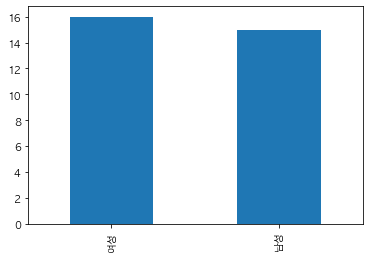

In [7]:
df_count=df_fitness["GENDER"].value_counts()
df_count.plot.bar()

<AxesSubplot:>

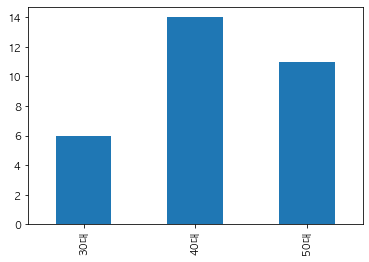

In [9]:
df_count=df_fitness["AGEGROUP"].value_counts()
df_count.sort_index(inplace=True)
df_count.plot.bar()

<AxesSubplot:>

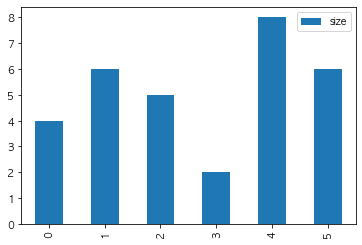

In [12]:
df_groupby_total=df_fitness.groupby(["GENDER","AGEGROUP"],as_index=False).size()
df_groupby_total.plot.bar()

# HISTOGRAM

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'WEIGHT'}>,
        <AxesSubplot:title={'center':'OXY'}>],
       [<AxesSubplot:title={'center':'RUNTIME'}>,
        <AxesSubplot:title={'center':'RUNPULSE'}>,
        <AxesSubplot:title={'center':'RSTPULSE'}>],
       [<AxesSubplot:title={'center':'MAXPULSE'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

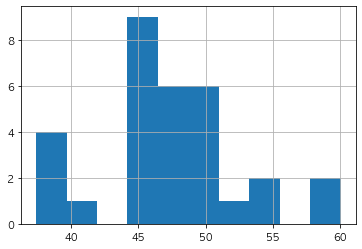

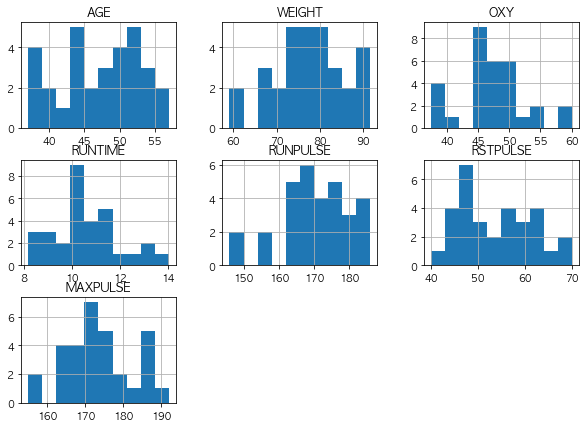

In [14]:
df_fitness["OXY"].hist()
df_fitness.hist(figsize=(10,7))

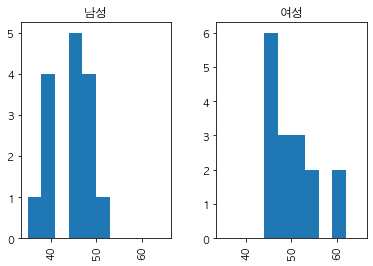

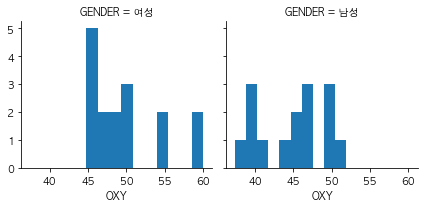

In [17]:
df_fitness.hist(column="OXY",by="GENDER",range=(35,65))
grid=sns.FacetGrid(df_fitness,col="GENDER")
grid.map(plt.hist,"OXY")

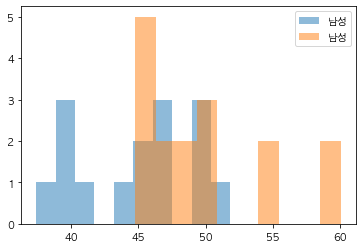

In [21]:
plt.hist(df_fitness[df_fitness["GENDER"]=='남성']["OXY"],label="남성",alpha=0.5)
plt.hist(df_fitness[df_fitness["GENDER"]=='여성']["OXY"],label="남성",alpha=0.5)
plt.legend()

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <BarContainer object of 20 artists>)

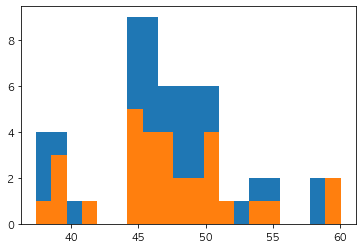

In [22]:
plt.hist(x="OXY",data=df_fitness)
plt.hist(x="OXY",data=df_fitness,bins=20)

# BOX PLOT

<AxesSubplot:title={'center':'OXY'}, xlabel='[GENDER, AGEGROUP]'>

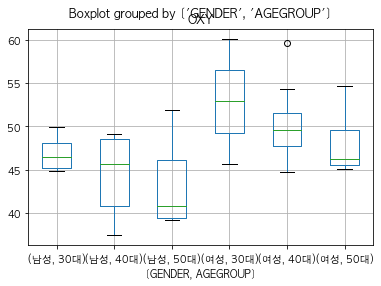

In [15]:
df_fitness.boxplot(column="OXY",by=["GENDER","AGEGROUP"])

# PIE CHART

<AxesSubplot:ylabel='None'>

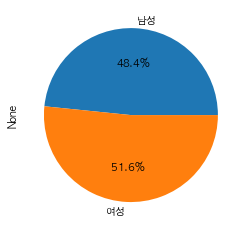

In [23]:
df_count=df_fitness.groupby(["GENDER"]).size()
df_count.plot.pie(y="OXY",autopct="%.1f%%")

# SCATTER PLOT

<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

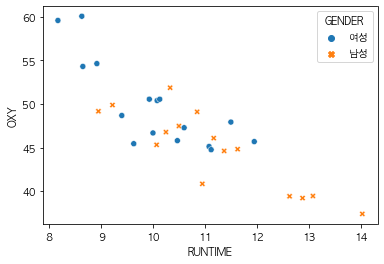

In [27]:
sns.scatterplot(x="RUNTIME",y="OXY",hue="GENDER",style="GENDER",data=df_fitness)

# SCATTER MATRIX

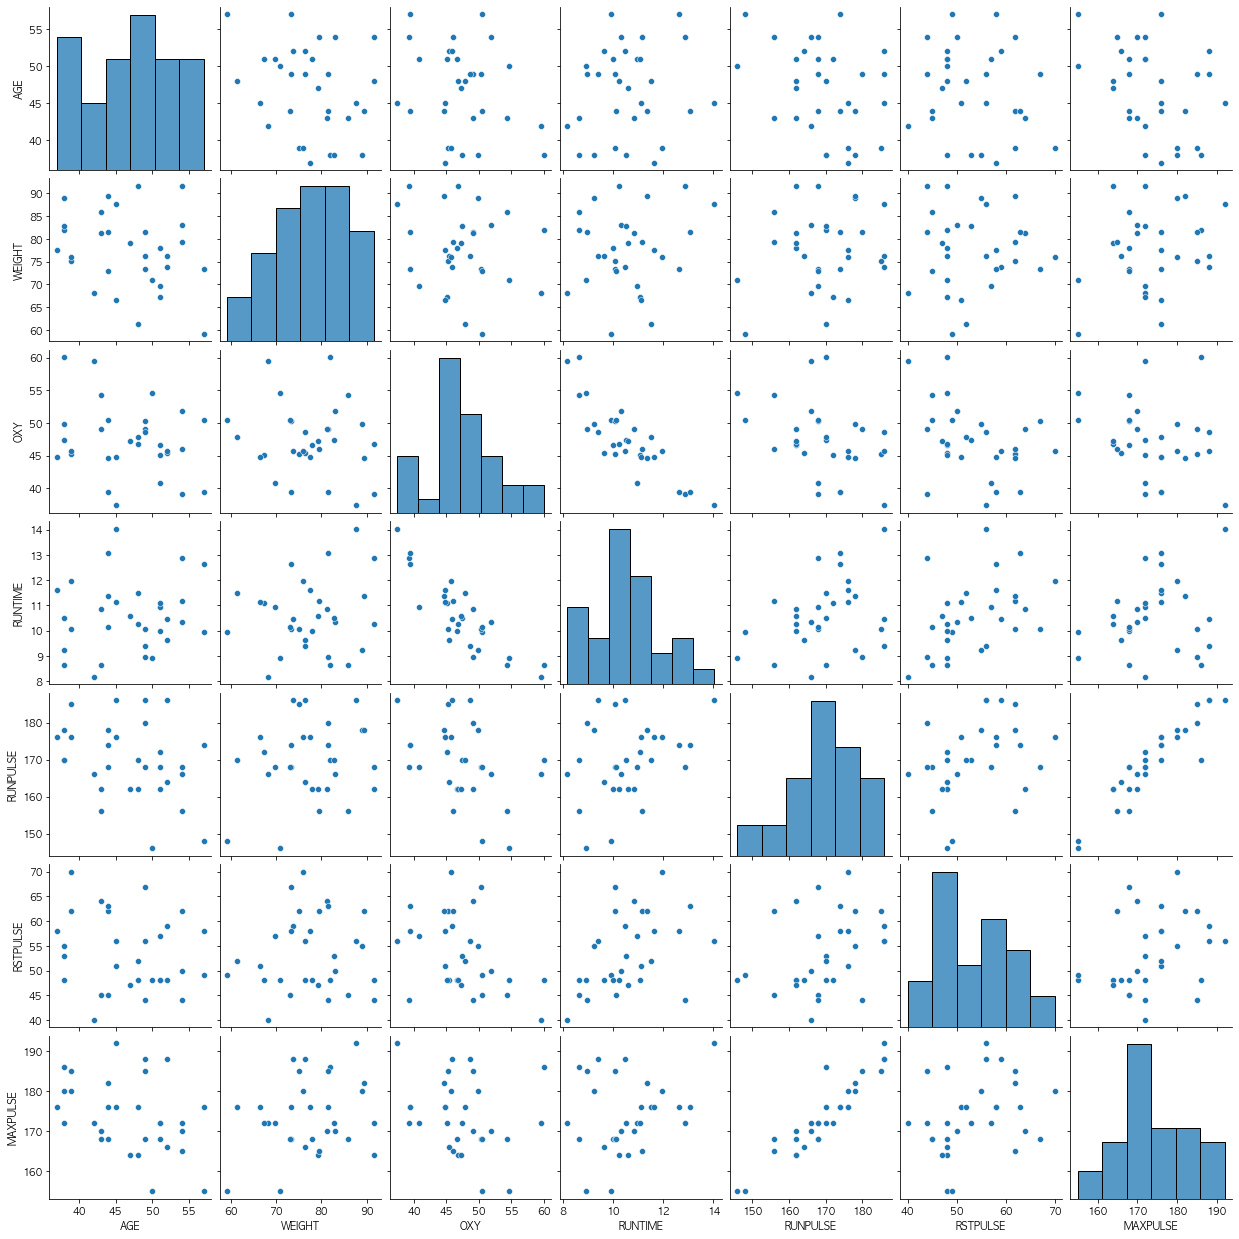

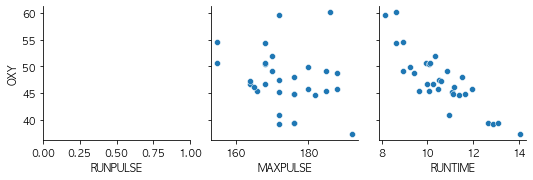

In [28]:
sns.pairplot(df_fitness)
sns.pairplot(df_fitness,y_vars=["OXY"],x_vars=["RUNPULSE","MAXPULSE","RUNTIME"])

# TREND CHART

In [32]:
df_currency=pd.read_csv("/Users/lee/Week3/환율.csv",engine="python",encoding='cp949',parse_dates=["APPL_DATE"])
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


In [35]:
df_currency_pivot=df_currency.pivot(index="APPL_DATE",columns="CURRENCY",values="STD_RATE")
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


<AxesSubplot:xlabel='APPL_DATE'>

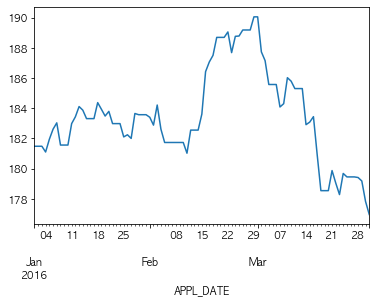

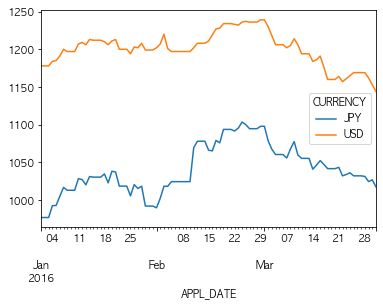

In [36]:
df_currency_pivot["CNY"].plot()
df_currency_pivot[["JPY","USD"]].plot()

# HEAT MAP

<AxesSubplot:xlabel='AGEGROUP', ylabel='GENDER'>

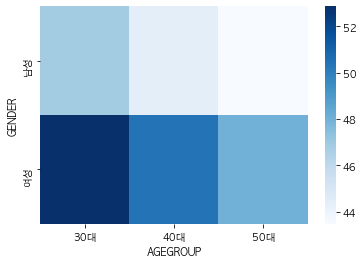

In [37]:
# 성별과 연령대별 할당 산소 요구량 평균계산,Groupby(성별,연령),agg("mean"):혈당산소요구량 평균값
df_agg=df_fitness.groupby(["GENDER","AGEGROUP"],as_index=False).agg("mean")
df_pivot=df_agg.pivot("GENDER","AGEGROUP","OXY")
sns.heatmap(df_pivot,cmap="Blues")

# CONTOUR PLOT

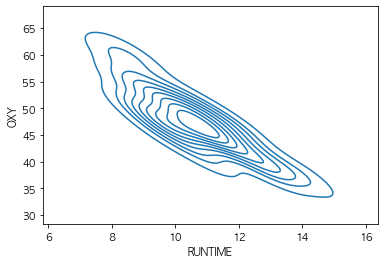

In [38]:
#kdeplot(x축,y축,shade:음영선택여부)
sns.kdeplot(df_fitness["RUNTIME"],df_fitness["OXY"],shade=False);

# PARALLEL PLOT

<AxesSubplot:>

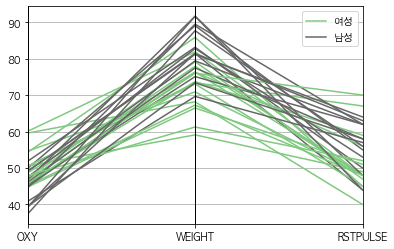

In [39]:
# parallel_coordinates(데이터,그룹변수,cols=변수,colormap=다양한 colormap지정)
pd.plotting.parallel_coordinates(df_fitness,"GENDER",cols=["OXY","WEIGHT","RSTPULSE"],colormap="Accent")

# CUSTOMIZING

Text(484.6727272727271, 0.5, '혈당산소요구량')

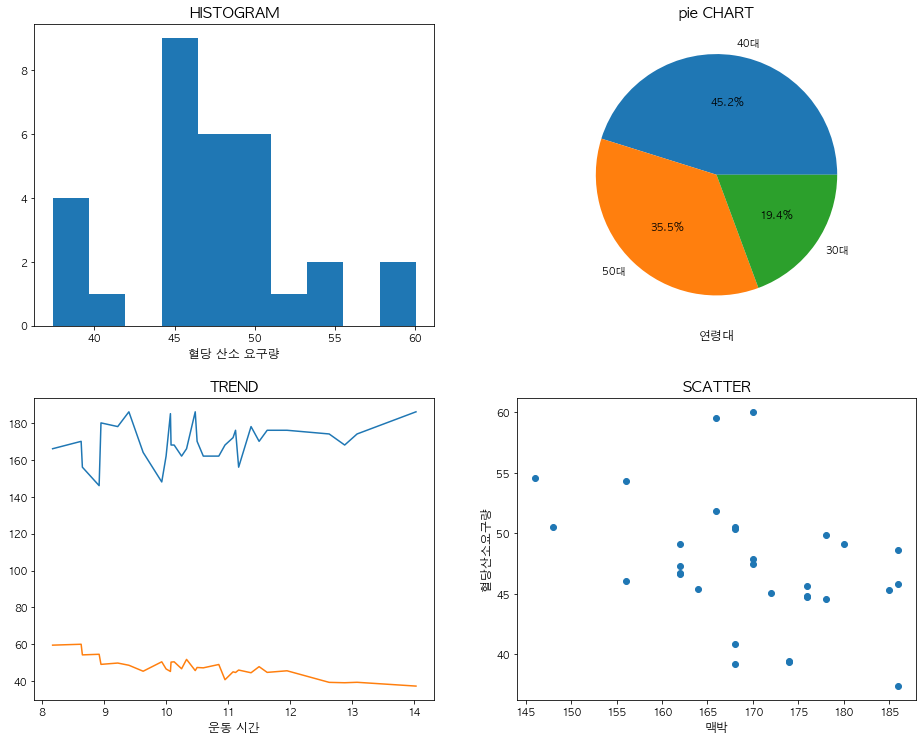

In [40]:
df_count=df_fitness["AGEGROUP"].value_counts()
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(13,10))
plt.tight_layout(w_pad=5,h_pad=5)

axes[0,0].hist(df_fitness["OXY"])
axes[0,0].set_title("HISTOGRAM",fontsize=15)
axes[0,0].set_xlabel("혈당 산소 요구량",fontsize=12)

axes[0,1].pie(df_count,labels=df_count.index.tolist(),autopct="%.1f%%")
axes[0,1].set_title("pie CHART",fontsize=15)
axes[0,1].set_xlabel("연령대",fontsize=12)

axes[1,0].plot("RUNTIME","RUNPULSE",data=df_fitness,label="맥박")
axes[1,0].plot("RUNTIME","OXY",data=df_fitness,label="혈당산소요구량")
axes[1,0].set_title("TREND",fontsize=15)
axes[1,0].set_xlabel("운동 시간",fontsize=12)
axes[1,0].legend

axes[1,1].scatter("RUNPULSE","OXY",data=df_fitness)
axes[1,1].set_title("SCATTER",fontsize=15)
axes[1,1].set_xlabel("맥박",fontsize=12)
axes[1,1].set_ylabel("혈당산소요구량",fontsize=12)